<a href="https://colab.research.google.com/github/camilo520/ProcesamientoImagen/blob/master/Clase_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#importar librerias

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path='/content/drive/My Drive/ProcesamientoImagen/'
os.chdir(path)
!pwd
%matplotlib inline

/content/drive/My Drive/ProcesamientoImagen


In [0]:
def displayGray3(a, b, c, title1="Original", title2="Edited", title3="Edited"):
    plt.figure(figsize=(3,3))
    plt.subplot(131),plt.imshow(a, cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(b, cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(133),plt.imshow(c, cmap='gray'), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
    
def displayGray2(a, b, title1="Original", title2="Edited"):
    plt.figure(figsize=(10,10))
    plt.subplot(121),plt.imshow(a, cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(b, cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
    
def displayColor3(a, b, c, title1="Original", title2="Edited", title3="Edited"):
    plt.figure(figsize=(10,10))
    plt.subplot(131),plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(133),plt.imshow(c), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.show()    
    
    
def displayColor2(a, b, title1="Original", title2="Edited"):
    plt.figure(figsize=(10,10))
    plt.subplot(121),plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()        
    
def readRGB(imgPath):
    img=cv2.imread(imgPath)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

# Implementacion Nearest **Neighbour**

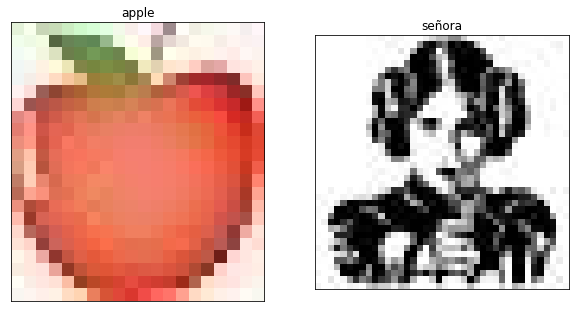

In [4]:
imgA=readRGB('apple20x22.jpg')
imgM=readRGB('ico.jpg')
near_imgA=cv2.resize(imgA, None, fx=5, fy=5, interpolation=cv2.INTER_NEAREST)
near_imgM=cv2.resize(imgM, None, fx=5, fy=5, interpolation=cv2.INTER_NEAREST)
displayColor2(near_imgA, near_imgM,'apple','señora')

# Interpolacion **Lineal**

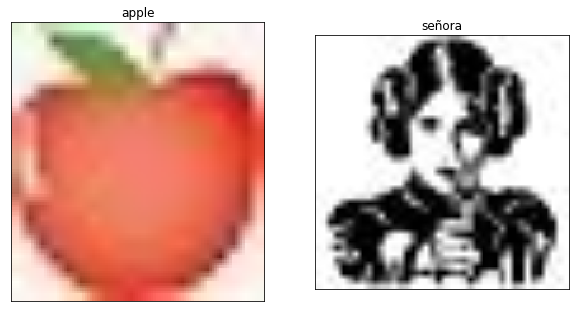

In [5]:
imgA=readRGB('apple20x22.jpg')
imgM=readRGB('ico.jpg')
near_imgA=cv2.resize(imgA, None, fx=5, fy=5, interpolation=cv2.INTER_LINEAR)
near_imgM=cv2.resize(imgM, None, fx=5, fy=5, interpolation=cv2.INTER_LINEAR)
displayColor2(near_imgA, near_imgM,'apple','señora')

# Interpolacion **Bicubica**

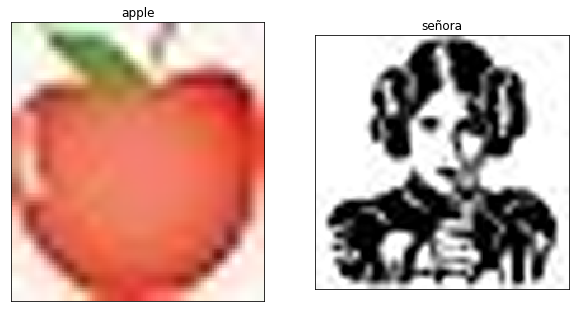

In [6]:
imgA=readRGB('apple20x22.jpg')
imgM=readRGB('ico.jpg')
near_imgA=cv2.resize(imgA, None, fx=5, fy=5, interpolation=cv2.INTER_CUBIC)
near_imgM=cv2.resize(imgM, None, fx=5, fy=5, interpolation=cv2.INTER_CUBIC)
displayColor2(near_imgA, near_imgM,'apple','señora')

# Otros **algoritmos**

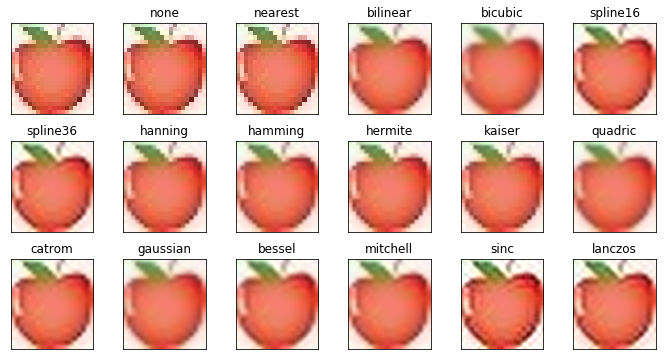

In [7]:
methods=[None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
        'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
        'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

grid=imgA

fig, axes=plt.subplots(3,6,figsize=(12,6), subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)

for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(grid, interpolation=interp_method)
    ax.set_title(interp_method)
    
    
plt.show()

# Negativo de una **imagen** a color

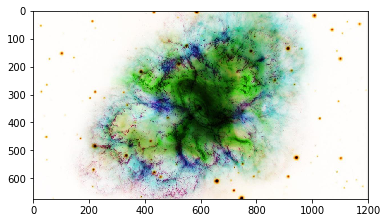

In [8]:
from PIL import Image
foto=Image.open('ciencia-del-universo-1530540262286.jpg')
datos=list(foto.getdata())
datos_invertidos=[(255 - datos[x][0], 255 - datos[x][1], 255 - datos[x][2]) for x in range(len(datos))]
imagen_invertida=Image.new('RGB', foto.size)
imagen_invertida.putdata(datos_invertidos)
plt.imshow(np.asarray(imagen_invertida))

# Negativo de una imagen en **gris**

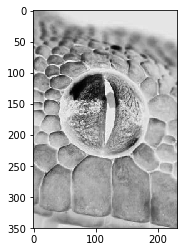

In [9]:
from PIL import Image
foto=Image.open('ojo.jpg')
datos=list(foto.getdata())
datos_invertidos=[255 - x for x in datos]
imagen_invertida=Image.new('L', foto.size)
imagen_invertida.putdata(datos_invertidos)
plt.imshow(np.asarray(imagen_invertida), cmap='gray')

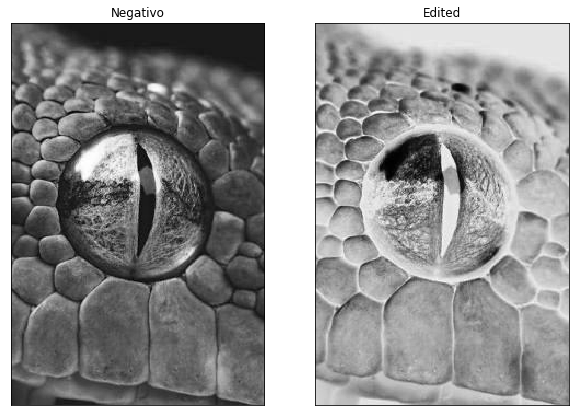

In [10]:
def negative(l):
    img=cv2.imread("ojo.jpg", cv2.IMREAD_GRAYSCALE)
    rows, columns = img.shape
    img2=np.zeros((rows, columns), dtype=np.uint8)
    for x in range(rows):
        for y in range(columns):
            img2[x,y]=(l-1)-img[x,y]
    displayGray2(img,img2,'original','Negativo')
    return
  
negative(256)  

# Funcion **logaritmica**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


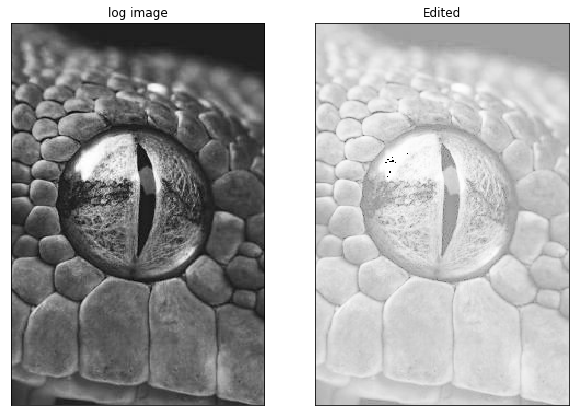

In [11]:
import cv2
import numpy as np
img=cv2.imread('ojo.jpg')
img_log=(np.log(img+1)/(np.log(1+np.max(img))))*255
img_log=np.array(img_log, dtype=np.uint8)
displayGray2(img,img_log, 'original','log image')

# Transformacion ley de potencia (gamma)**texto en negrita**

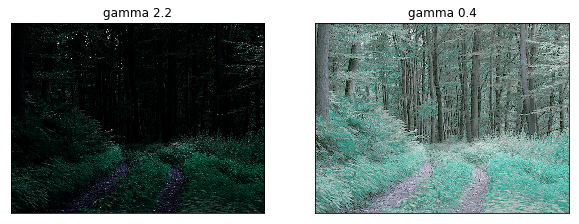

In [14]:
import numpy as np
import cv2

img = cv2.imread('tree.png')
gamma_two_point_two=np.array(255*(img/255)**2.2, dtype='uint8')
gamma_point_four=np.array(255*(img/255)**0.4, dtype='uint8')
displayGray2(gamma_two_point_two, gamma_point_four, 'gamma 2.2', 'gamma 0.4')

# **Binarizacion**

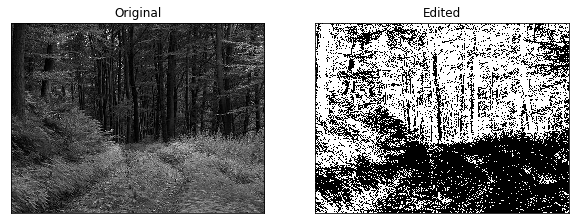

In [34]:
def binarizacion(img, minr=10,maxr=60):
    img=cv2.imread(img,0)
    row, column=img.shape
    img1=np.zeros((row,column), dtype='uint8')
    min_range=minr
    max_range=maxr
    
    for i in range(row):
        for j in range(column):
            if img[i,j]>min_range and img[i,j]<max_range:
                img1[i,j]=255
            else:
                img1[i,j]=0
    
    displayGray2(img,img1)

binarizacion('tree.png', 10, 60)

# **Fraccionamiento**

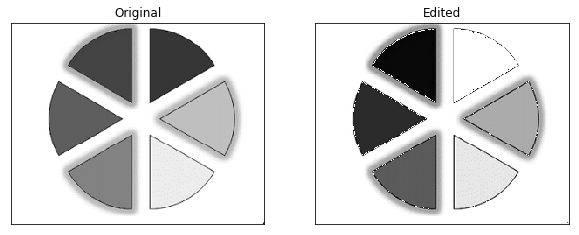

In [53]:
def Fraccionamiento(img, minr=10, maxr=60):
    img=cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    rows, columns = img.shape
    img2=np.zeros((rows,columns), dtype=np.uint8)
    
    a=minr
    b=maxr
    
    for x in range(0, rows):
        for y in range(0, columns):
            r=img[x][y]
            if a <= r and r<=b:
                img2[x][y]=255
            else:
                img2[x][y]=img[x][y]
    displayGray2(img, img2)
    return
  
Fraccionamiento('pastel.png', 0, 60)
#binarizacion('pastel.png', 0, 60)

# **Threshold**

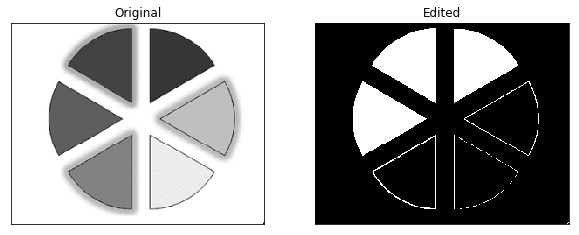

In [56]:
def Threshold(img, thres):
    img=cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    rows, columns = img.shape
    img2=np.zeros((rows, columns), dtype=np.uint8)
    
    T=thres
    
    for x in range(0,rows):
        for y in range(0, columns):
            r=img[x][y]
            if T<=r:
                img2[x][y]=0
            else:
                img2[x][y]=255
    displayGray2(img, img2)
    return
  
Threshold('pastel.png', 125)  

# Separar la imagen por **bits**

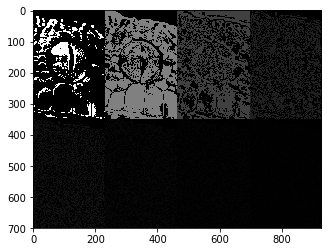

In [57]:
img = cv2.imread('ojo.jpg',0)

lst=[]
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        lst.append(np.binary_repr(img[i][j], width=8))
        
eight_bit_img=(np.array([int(i[0]) for i in lst], dtype=np.uint8) * 128).reshape(img.shape[0], img.shape[1])
seven_bit_img=(np.array([int(i[1]) for i in lst], dtype=np.uint8) * 64).reshape(img.shape[0], img.shape[1])
six_bit_img=(np.array([int(i[2]) for i in lst], dtype=np.uint8) * 32).reshape(img.shape[0], img.shape[1]) 
five_bit_img=(np.array([int(i[3]) for i in lst], dtype=np.uint8) * 16).reshape(img.shape[0], img.shape[1]) 
four_bit_img=(np.array([int(i[4]) for i in lst], dtype=np.uint8) * 8).reshape(img.shape[0], img.shape[1]) 
three_bit_img=(np.array([int(i[5]) for i in lst], dtype=np.uint8) * 4).reshape(img.shape[0], img.shape[1]) 
two_bit_img=(np.array([int(i[6]) for i in lst], dtype=np.uint8) * 2).reshape(img.shape[0], img.shape[1]) 
one_bit_img=(np.array([int(i[7]) for i in lst], dtype=np.uint8) * 1).reshape(img.shape[0], img.shape[1]) 

finalr=cv2.hconcat([eight_bit_img,seven_bit_img,six_bit_img,five_bit_img])
finalv=cv2.hconcat([four_bit_img,three_bit_img,two_bit_img,one_bit_img])

final=cv2.vconcat([finalr, finalv])
plt.imshow(final, cmap='gray')

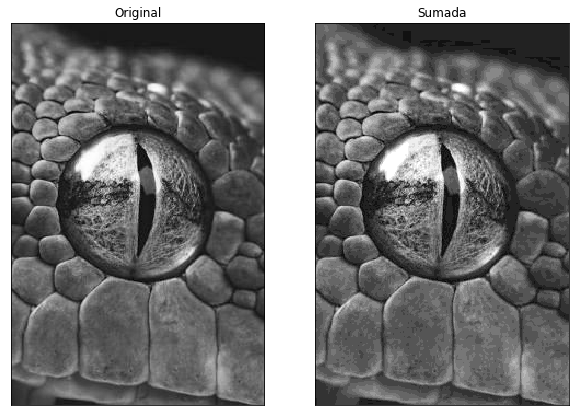

In [61]:
new_img = eight_bit_img+ seven_bit_img+six_bit_img+five_bit_img
#plt.imshow(new_img, cmap='gray')
displayGray2(img, new_img, 'Original', 'Sumada');

# Histograma escala de **grises**

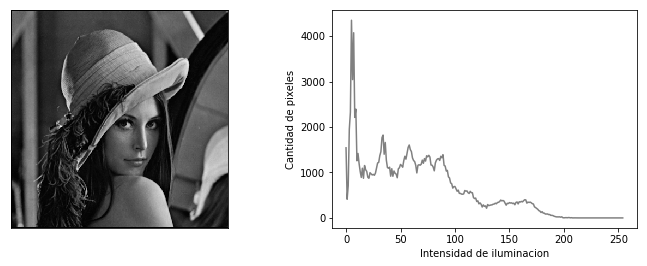

In [64]:
img=cv2.imread('lenaD.png', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img], [0], None, [255], [0, 256])

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist, color='gray')
plt.xlabel('Intensidad de iluminacion')
plt.ylabel('Cantidad de pixeles')
plt.show()

# Histograma imagen a **color**

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


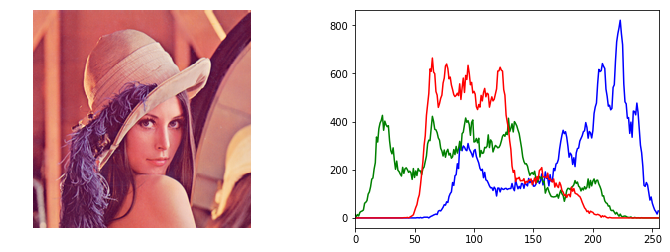

In [67]:
img=readRGB('lena.png')
color=('b','g','r')

plt.figure(figsize=(12,4))
plt.subplot(1,2,1), plt.imshow(img)
plt.axis("off")

for i, c in enumerate(color):
    hist=cv2.calcHist([img], [i], None, [256], [0,256])
    plt.subplot(1,2,2), plt.plot(hist, color=c)
    plt.xlim([0,256])
    
plt.show()    